Group Name- Group 112 Sal

Name- Saloni Chawla(s3800556), Rohit Gupta(s3798988)

# Predicting Heart Disease

The objective of this project is to build a model to anticipate whether an individual will be determined to have a heart disease or not. It is based on the pattern extracted from analysing 13 descriptive features found in Heart Disease data set from UCI Machine Learning Repository . Hence we will use this data to create models to predict 

The UCI Machine Learning Repository provides four databases linked to the above source namely, Cleveland, Hungary, Switzerland and the VA Long Beach with 76 attributes. Out of these 4 sets Cleveland data set was the benchmark for many researchers as it is more robust and easy to use compared to other 3. Out of 76 attributes 14 were selected as many of them repeat similar information and some attributes are not related with target attribute. The Cleveland database file has been processed and used in this project. 

This report is organized as follows:
- [Section 2 (Overview)](#2) outlines our methodology. 
- [Section 3 (Data Preparation)](#3) summarizes the data preparation process and our model evaluation strategy. 
- [Section 4 (Data Exploration)](#4) Univariate, Bivariate and Trivariate relationships explored.
- [Section 5 (Data Modelling)](#5) presents model performance comparison results.
- [Section 6 (Model Comparison)](#6) Compares all the models built in Data Modelling on Test data 
- [Section 7 (Limitations)](#7) discusses a limitations of our approach and possible solutions. 
- [Section 8 (Summary)](#8) provides a brief summary of our work in this project.
- [Section 9 (References)](#9) Gives the source and references of data.



# Overview <a class="anchor" id="2"></a> 

### Methodology



In our dataset, 13 descriptive features named below are used.

1. age: Age of the patient
2. sex: Sex of the patient
3. cp: Chest pain type
4. rest_bp: Resting blood pressure-in mm Hg on admission to the hospital
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results
8. max_heart_rate: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by flourosopy
13. thal: The heart status as retrieved from Thallium test

Target Feature: 
The response feature is num which is given as:

Value 0: < 50% diameter narrowing
Value 1,2,3,4: > 50% diameter narrowing
The num column has values 0,1,2,3,4 where 0 shows no heart disease symptoms whereas 1,2,3,4 show the person has a heart disease. Hence we create a new column which has values “No Heart Disease” for 0 and “Heart Disease” for 1,2,3,4. The target feature has two classes so it is a binary classification problem. To reiterate, The goal is to predict whether a person has heart disease or not.
 


In this project we have used 4 Classification models to predict the presence of a heart disease.
1. K-Nearest Neighbours (KNN)
2. Decision Tree
3. Random Forest
4. Gaussian Naive Bayes (NB)

First thing we did was to Preprocess the Data to make it fit for Modelling. Hence our first step is Data Cleaning.
Next we explore the data to understand the dependence and relations among the descriptive features and the Target Feature. This would also help us to know which features are essential and need to be selected for Data Modeling. Next we have used Pipelines and we have done Feature Selection, Hyperparameter Tuning and Training the model for each of the models stated above. Using feature selection together with hyperparameter search inside a single pipeline we have conducted 5-fold Stratified cross validation to fine tune the hyperparameters of each classifier using Accuracy as the Performance Metric. Looking at the dataset we believe that Accuracy is the best performance metric as in our target feature we identify whether the person has a Heart Disease or not and we don’t want to miss on a patient who is having a heart disease but goes undetected (false negative) or if a persont not having heart disease is detected as having one. Also, looking at the target feature, 160 cases do not show the presence of Heart disease whereas 137 cases show the presence of heart disease out of a total of 297 cases. This shows that there are more number of people in the data set who do not have a heart disease. Stratfication helps in ensuring that we have the same proportion of presence and absence of heart disease.
Lastly we apply 5-Fold cross validation on the Test data after selecting the best model for our dataset. We also compare all the models using paired t-test for all the combination of the models. We further analyse the classification report and the confusion Matrix to identify the Best Model.

# Data Preparation <a class="anchor" id="3"></a> 

## Loading Dataset

The data has missing values in the form of special characters '?' and we use the na_values argument to consider '?' as NAs. 
For naming consistency with the data dictionary, we purposely skipped the headers and manually renamed the columns.
The first five rows of the heart dataset are displayed using head() function.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import io
import requests
import os, ssl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1= pd.read_csv('processed.cleveland.data', sep=',', header = None, names =['age', 'sex', 'cp', 'rest_bp', 'chol', 'fbs', 'restecg',
                   'max_heart_rate', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], encoding='utf-8', na_values = '?')


df1.head()

,age,sex,cp,rest_bp,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Checking the shape of dataset
We check the shape of the dataset to recheck wheather the loaded dataset has the expected number of rows and columns.

In [3]:
df1.shape

(303, 14)

The structure of the data is checked and it confirms that there are 303 observations with 14 variables.

### Checking Data Types

The below code helps us understand the data types of all columns. Python has automatically converted the numerical values to float.

In [4]:
df1.dtypes

age               float64
sex               float64
cp                float64
rest_bp           float64
chol              float64
fbs               float64
restecg           float64
max_heart_rate    float64
exang             float64
oldpeak           float64
slope             float64
ca                float64
thal              float64
num                 int64
dtype: object

### Check for Missing values

We check the data for any missing values and we see 4 missing values for column ca and 2 missing values for column thal.

In [5]:
df1.isna().sum()

age               0
sex               0
cp                0
rest_bp           0
chol              0
fbs               0
restecg           0
max_heart_rate    0
exang             0
oldpeak           0
slope             0
ca                4
thal              2
num               0
dtype: int64

Since, the number of missing values is < 1% of the total rows, we can exclude these cases as we will not have any loss of information.

In [6]:
print(df1['ca'].unique())
print(df1['thal'].unique())
df1=df1.dropna()

df1.shape

[ 0.  3.  2.  1. nan]
[ 6.  3.  7. nan]


(297, 14)

We again Check for missing values and find none.

In [7]:
df1.isna().sum()

age               0
sex               0
cp                0
rest_bp           0
chol              0
fbs               0
restecg           0
max_heart_rate    0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
num               0
dtype: int64

In [8]:
df1.shape 

(297, 14)

After treating all the missing values we are left with 297 rows and 14 columns. 

### Changing Labels

We are changing the labels for the categorical columns in the data based on the description provided in the dataset and for the non categorical variables we are changing the data type to int for values where decimal is not required.
We do so because we will further do one hot encoding for these categorical columns to make them more meaningful for the Data Modelling Step.

In [9]:
df_data=df1.copy()
df_data['sex'] = df_data['sex'].replace({0: 'Female', 1: 'Male'})

df_data['cp'] = df_data['cp'].replace({1: 'Typical Angina', 2: 'Atypical Angina', 3: 'Non-Anginal pain', 
                                                   4: 'Asymptomatic'})

df_data['rest_bp'] = df_data['rest_bp'].astype(int)

df_data['chol'] = df_data['chol'].astype(int)

df_data['fbs'] = df_data['fbs'].replace({0: 'False', 1: 'True'})

df_data['restecg'] = df_data['restecg'].replace({0: 'Normal', 1: 'Abnormality', 2: 'Hypertrophy'})

df_data['max_heart_rate'] = df_data['max_heart_rate'].astype(int)

df_data['exang'] = df_data['exang'].replace({0: 'No', 1: 'Yes'})

df_data['slope'] = df_data['slope'].replace({1: 'Up', 2: 'Flat', 3: 'Down'})

df_data['ca'] = df_data['ca'].replace({0: 'No vessel', 1: 'One vessel', 2: 'Two vessel', 3: 'Three vessel'})

df_data['thal'] = df_data['thal'].replace({3: 'Normal', 6: 'Fixed Defect', 7: 'Reversable Defect'}) 

df_data['num']= df_data['num'].replace({0: 'No Heart Disease', 1: 'Heart Disease', 2: 'Heart Disease', 3: 'Heart Disease', 4: 'Heart Disease'})

Displaying the first five rows of the reformed dataset.

In [10]:
df_data.head()

,age,sex,cp,rest_bp,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,num
0,63.0,Male,Typical Angina,145,233,True,Hypertrophy,150,No,2.3,Down,No vessel,Fixed Defect,No Heart Disease
1,67.0,Male,Asymptomatic,160,286,False,Hypertrophy,108,Yes,1.5,Flat,Three vessel,Normal,Heart Disease
2,67.0,Male,Asymptomatic,120,229,False,Hypertrophy,129,Yes,2.6,Flat,Two vessel,Reversable Defect,Heart Disease
3,37.0,Male,Non-Anginal pain,130,250,False,Normal,187,No,3.5,Down,No vessel,Normal,No Heart Disease
4,41.0,Female,Atypical Angina,130,204,False,Hypertrophy,172,No,1.4,Up,No vessel,Normal,No Heart Disease


### Summary Statistics

Summary statistics of all the numeric columns are given below. 
We can note that numeric columns have no impossible values for example minimum and maximum of age variable lies between 29-77 which is possible. Similarly all the other values are resonable and hence we don't have any outliers in the dataset. 

In [11]:
df_data.describe(include = np.number).round(2)

,age,rest_bp,chol,max_heart_rate,oldpeak
count,297.00,297.00,297.00,297.00,297.00
mean,54.54,131.69,247.35,149.60,1.06
std,9.05,17.76,52.00,22.94,1.17
min,29.00,94.00,126.00,71.00,0.00
25%,48.00,120.00,211.00,133.00,0.00
50%,56.00,130.00,243.00,153.00,0.80
75%,61.00,140.00,276.00,166.00,1.60
max,77.00,200.00,564.00,202.00,6.20


Summary statistics for all the object type columns are given below. We can recheck the count and unique values for each variable for these statistics and the frequency of the maximum occuring class of each variable.

In [12]:
df_data.describe(include = np.object)

,sex,cp,fbs,restecg,exang,slope,ca,thal,num
count,297,297,297,297,297,297,297,297,297
unique,2,4,2,3,2,3,4,3,2
top,Male,Asymptomatic,False,Normal,No,Up,No vessel,Normal,No Heart Disease
freq,201,142,254,147,200,139,174,164,160


### Encoding

We perform encoding for modelling purpose. We convert all the categorical features (Target and all the descriptive features) to numerical.


###  Target Feature Encoding

We remove the "num" feature from the full dataset and call it "target".
We encode it with 0 and 1 where 0 represents No Heart Disease and 1 flags the person with a Heart Disease. 

In [13]:
df = df_data.drop(columns='num')
target = df_data['num']
target.value_counts()

No Heart Disease    160
Heart Disease       137
Name: num, dtype: int64

In [14]:
target = target.replace({'No Heart Disease': 0, 'Heart Disease': 1})
target.value_counts()

0    160
1    137
Name: num, dtype: int64

###  Encoding Descriptive Features

We perform one-hot-encoding for the nominal descriptive features. In the below code, we extract the categorical variables and encoding is done differently for columns with 2 levels and those with more than 2 levels.


In [15]:
categorical_cols = df.columns[df.dtypes==object].tolist()

We again check the data types to ensure our object type columns.

In [16]:
df.dtypes

age               float64
sex                object
cp                 object
rest_bp             int32
chol                int32
fbs                object
restecg            object
max_heart_rate      int32
exang              object
oldpeak           float64
slope              object
ca                 object
thal               object
dtype: object

We use a for loop to create dummies out of variables and we apply our condition where if the columns have only 2 unique values binary encoding can be applied to them and they can be assigned to a single column. 

In [17]:
for col in categorical_cols:
    n = len(df[col].unique())
    if (n == 2):
        df[col] = pd.get_dummies(df[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
df = pd.get_dummies(df)

After creating the dummies we again check the shape of the dataset as new columns would be added. 

In [18]:
print(df.shape)

(297, 25)


In [19]:
df.head()

,age,sex,rest_bp,chol,fbs,max_heart_rate,exang,oldpeak,cp_Asymptomatic,cp_Atypical Angina,...,slope_Down,slope_Flat,slope_Up,ca_No vessel,ca_One vessel,ca_Three vessel,ca_Two vessel,thal_Fixed Defect,thal_Normal,thal_Reversable Defect
0,63.0,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,67.0,1,160,286,0,108,1,1.5,1,0,...,0,1,0,0,0,1,0,0,1,0
2,67.0,1,120,229,0,129,1,2.6,1,0,...,0,1,0,0,0,0,1,0,0,1
3,37.0,1,130,250,0,187,0,3.5,0,0,...,1,0,0,1,0,0,0,0,1,0
4,41.0,0,130,204,0,172,0,1.4,0,1,...,0,0,1,1,0,0,0,0,1,0


We display the names of all the columns to see the names of new set of columns after encoding.

In [20]:
df.columns

Index(['age', 'sex', 'rest_bp', 'chol', 'fbs', 'max_heart_rate', 'exang',
       'oldpeak', 'cp_Asymptomatic', 'cp_Atypical Angina',
       'cp_Non-Anginal pain', 'cp_Typical Angina', 'restecg_Abnormality',
       'restecg_Hypertrophy', 'restecg_Normal', 'slope_Down', 'slope_Flat',
       'slope_Up', 'ca_No vessel', 'ca_One vessel', 'ca_Three vessel',
       'ca_Two vessel', 'thal_Fixed Defect', 'thal_Normal',
       'thal_Reversable Defect'],
      dtype='object')

# Data Exploration <a class="anchor" id="4"></a> 

## Univariate Visualisation

####  Plot for Target Variable
The plot for target variable shows that we have more number of people with no heart disease but there is not a huge difference in the numbers. The number of people who don't have a heart disease are 160 whreas the number of people who have heart disease are 137.

Text(0.5, 0, 'Number of people')

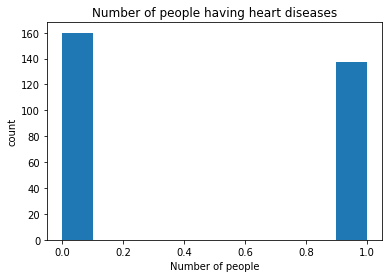

In [21]:
target.plot.hist()
plt.title('Number of people having heart diseases')
plt.ylabel('count')
plt.xlabel('Number of people')

####  Plot for Maximum Heart Rate
The histogram for Maximum Heart Rate is left skewed showing that majority of people had a high heart rate.

Text(0.5, 0, 'Number of people')

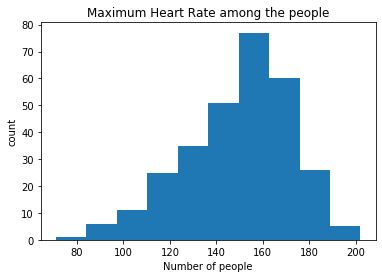

In [22]:
df_data['max_heart_rate'].plot.hist()
plt.title('Maximum Heart Rate among the people')
plt.ylabel('count')
plt.xlabel('Number of people')

#### Plot for different types of Chest Pain
The pie plot for different types of chest pain tell us that most people have an Asymptomatic chest pains and Typical Angina pain is the least common among the people who were tested.

Text(0.5, 1.0, 'Different Types of Chest Pain among people')

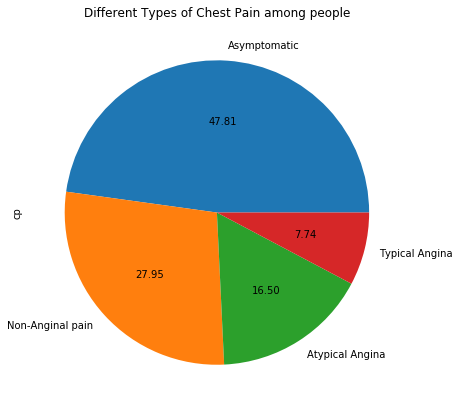

In [23]:
df_data['cp'].value_counts().plot(kind='pie',figsize=(10,7),autopct='%.2f')
plt.title('Different Types of Chest Pain among people')

#### Plot for Resting Blood Pressure
The histogramgiven below for Resting Blood Pressure is slightly left skewed which indicates that most people have a normal resting blood pressure that lies between 120-140.

Text(0.5, 0, 'Number of people')

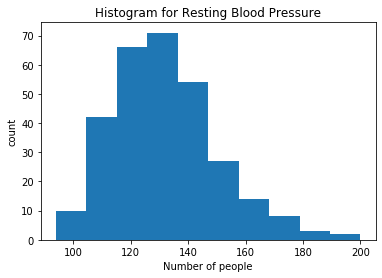

In [24]:
df['rest_bp'].plot.hist()
plt.title('Histogram for Resting Blood Pressure')
plt.ylabel('count')
plt.xlabel('Number of people')

#### Plot for Cholestrol
The histogram is right skewed which shows that some patients had high level of cholestoral. 

Text(0, 0.5, 'count')

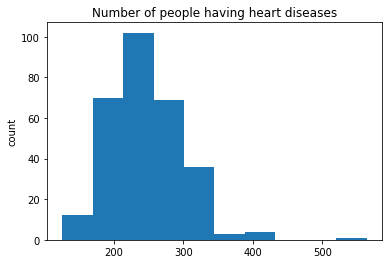

In [25]:
df['chol'].plot.hist()
plt.title('Number of people having heart diseases')
plt.ylabel('count')

## Bi-variate plots

#### Plot shows the people having Heart disease in different Gender
The bar plot depicts that the number of males was more than twice to that of females. Also, males were more likely to have a heart disease as compared to females.

Text(0.5, 1.0, 'Bar plot showing Heart Disease in Different Gender')

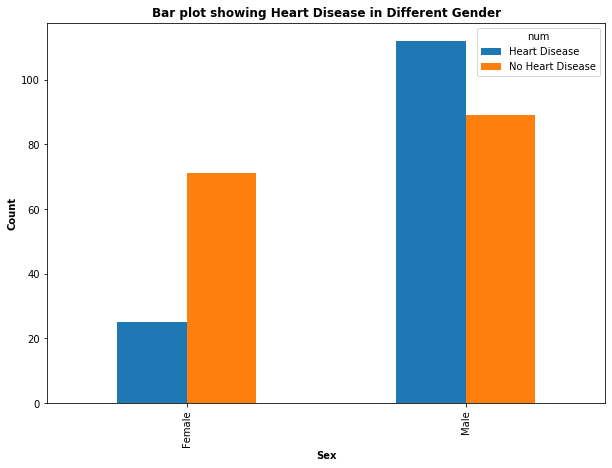

In [26]:
pd.crosstab(df_data['sex'],df_data['num']).plot(kind='bar',figsize=(10,7), stacked=False)
plt.ylabel('Count',fontweight='bold')
plt.xlabel('Sex',fontweight='bold')
plt.title('Bar plot showing Heart Disease in Different Gender',fontweight='bold')

#### Plot between age and Heart Disease
The line chart shows that majority of the patient's age was between 45-65 years. A major difference between the graphs for people with heart disease and people without heart disease is not seen and hence it may not be a major factor to predict a heart disease.

Text(0.5, 1.0, 'Line plot showing Heart Disease in Different Age')

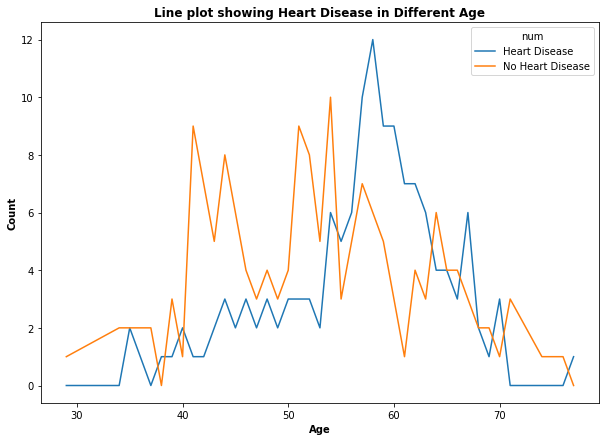

In [27]:
pd.crosstab(df_data['age'],df_data['num']).plot(kind='line',figsize=(10,7))
plt.ylabel('Count',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.title('Line plot showing Heart Disease in Different Age',fontweight='bold')

#### Plot between heart disease and Thalium tests
In the bar plot we see that Normal and reversible defect conditions were prominent from the Thallium Test. For people with No Heart Disease the heart status was Normal while the people with Heart disease had reversable defect condition as retrieved from the Thallium test.

Text(0.5, 1.0, 'Bar plot showing Heart Disease in Different Conditions')

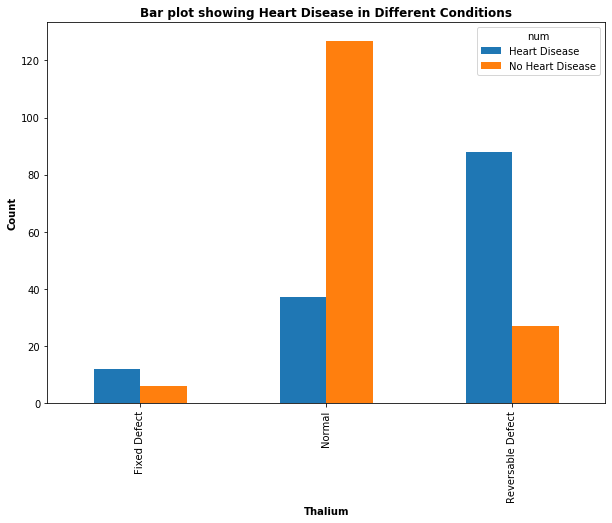

In [28]:
pd.crosstab(df_data['thal'],df_data['num']).plot(kind='bar',figsize=(10,7), stacked=False)
plt.ylabel('Count',fontweight='bold')
plt.xlabel('Thalium',fontweight='bold')
plt.title('Bar plot showing Heart Disease in Different Conditions',fontweight='bold')

#### Plot between sex and Chest Pain
The given below plot gives us an interesting conclusion that most male have an Asymptomatic Chest pain in women asymptomatic is nearly as common as non anginal chest pain. 

Text(0.5, 1.0, 'Bar plot showing Heart Disease in Different Gender')

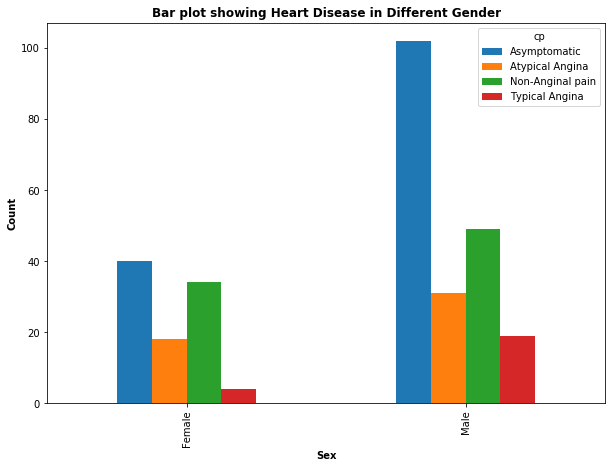

In [29]:
pd.crosstab(df_data['sex'],df_data['cp']).plot(kind='bar',figsize=(10,7), stacked=False)
plt.ylabel('Count',fontweight='bold')
plt.xlabel('Sex',fontweight='bold')
plt.title('Bar plot showing Heart Disease in Different Gender',fontweight='bold')

##  Three variable plot

### Plot 1:
The below given box plot is age by sex and the different conditions found by the Thalium tests conducted on the people. The plot shows that most people have a normal condition but we can say that as the age increases(above 50) fixed defect and Reversible Defect is more common in people. Also, hardly any female have Fixed Defect as a condition of Thallium Tests. 

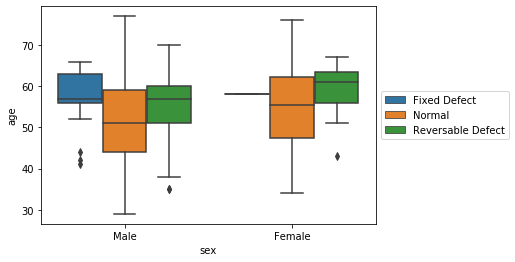

In [30]:
sns.boxplot(x='sex',y='age',hue='thal',data=df_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Plot 2:

The plot for distribution of Cholesterol by exercise Induced Angima and target feature signifying heart disease is plotted. It is seen that high cholesterol levels are associated with a Heart disease and is also seen in cases with both Exercise induced Angima and without Exercise Induced Angima. A difference between the medians for people with and without Heart Disease is seen where Exercise Induced Angima is found. The cases without Exercise induced Angima have very close median values for people with and without Heart Disease.

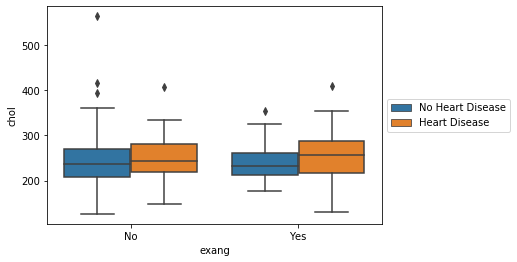

In [31]:
sns.boxplot(x='exang',y='chol',hue='num',data=df_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


### Plot 3

If Abnormality is encountered as a result for Resting electrocardiographic test then the person will have a heart disease for sure. If the result is Hypertrophy then people with age greater than 55 years are more probable to have a heart disease. For Normal results, the person can still develop a heart disease but it is more prominent in elder people.

Text(0.5, 0, 'Resting Electrocardiographic Test')

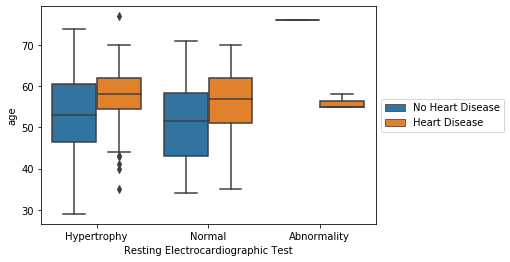

In [32]:
sns.boxplot(x='restecg',y='age',hue='num',data=df_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Resting Electrocardiographic Test')

## Scaling of Features

Before we do Data Modelling we need to Scale all the features. We do feature scaling in oreder to bring the range of all the features in one particular range. If the features have a different range it may introduce bian in the predictions.

* Before we scale the features we create a copy of the dataset in order to keep track of column names.
* We have used Min Max Scalar for the descriptive features.

In [33]:
from sklearn import preprocessing
df_copy = df.copy()

In [34]:
Data = preprocessing.MinMaxScaler().fit_transform(df_copy)

In [35]:
Data1 = pd.DataFrame(Data,columns=df_copy.columns)
Data1.head()

,age,sex,rest_bp,chol,fbs,max_heart_rate,exang,oldpeak,cp_Asymptomatic,cp_Atypical Angina,...,slope_Down,slope_Flat,slope_Up,ca_No vessel,ca_One vessel,ca_Three vessel,ca_Two vessel,thal_Fixed Defect,thal_Normal,thal_Reversable Defect
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.791667,1.0,0.622642,0.365297,0.0,0.282443,1.0,0.241935,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.791667,1.0,0.245283,0.235160,0.0,0.442748,1.0,0.419355,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data Modelling <a class="anchor" id="5"></a> 

The following Steps are carried out before we deploy various classification models for Data Modelling:

* First we import all the packages of Scikit Learn that will further be used in data Modelling.
* We are mainly going to use Accuracy as the performance metrics, this is because we don’t want to miss on a patient who is having a heart disease but goes undetected (false negative) or if a person not having heart disease is detected as having one.
* First we have created a base model using all the descriptive features in our model, moving forward we have explored feature engineering and feature selection to further improve the model.
* We have used two methods in Data Modelling:
    1. Repeated stratifed cross-validation method.
    2. GridSearchCV method

In [36]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.neighbors import KNeighborsClassifier

* all descriptive features

In [37]:
clf = KNeighborsClassifier(n_neighbors=3)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)

scoring_metric = 'accuracy'


In [38]:
cv_results_full = cross_val_score(estimator=clf,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_full

array([0.83333333, 0.81666667, 0.86440678, 0.88135593, 0.79661017,
       0.8       , 0.86666667, 0.81355932, 0.83050847, 0.84745763,
       0.86666667, 0.86666667, 0.84745763, 0.72881356, 0.91525424])

In [39]:
cv_results_full.mean().round(3)

0.838

We see that we get an accuracy of 82.4% using all the descriptive features.

In [40]:
#!pip install --upgrade altair

#!pip install vega vega_datasets

In [41]:
import altair as alt
alt.renderers.enable('html')


RendererRegistry.enable('html')

## Train-Test Split (Hold Out Sampling)

We use the standard split of 70:30 ratio to split the Data into Train and Test Split with stratification to preserve the Target ratio in the split.

In [42]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = \
    train_test_split(Data, target, test_size = 0.3, 
                     stratify=target, shuffle=True, random_state=999)

In [43]:
print(D_train.shape)
print(D_test.shape)

(207, 25)
(90, 25)


### Cross Validation

* Since the Dataset is not a large one we use the Repeated Strtified K-Fold method for Cross validation.
* n_splits- It partitions the dataset into k number of folds where each of the chunks is used for testing and rest is used to train the data. 
* n_repeats- It is used to iterate the process n number of times. We have used 3 repeats. This would help the model to overcome the problem of overfitting and underfitting.
* we use Statified k-fold to preserve the proportion of target levels in the split dataset which would further help reduce the bias or variance in the model. 


In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

### GridSearchCV

* We have also used a method called GridSearchCV in our model. We use this method as it builds multiple models of a particular classifier on the stated parameters.This is Hyperparameter Tuning, it enables us to train the data on various combinations of parameters which would help to identify the Model with the best parameters.



### Feature Selection and Ranking

Random Forest Importance (RFI) is a Machine Learning method which gives good accuracy, robustness and ease of use. It has the following features:

1. how much the accuracy decreases when a variable is excluded and the decrease in gini impurity when the variable is chosen to split a node.
2. It is comparatively faster than other feature selection techniques.

Random Forest Importance selects best number of features in the dataset according to its importance realtive to the target variable. We are introducing random forest importance during the hyperparameter tuning phase to get the best combination of classifier and number of features.

# Hyperparameter Tuning

## K-Nearest Neighbours (KNN)

* Feature selection and KNN hyperparameter tuning is done via cross validation and GridSearchCV using Pipeline feature.

* The hyperparameters for KNN are:
    1. Number of nearest neighbours- we have considered multiple values for nearest neighbours
    2. Distance metric p- we have used different distance metric.
    
        for p=1 the distance metric is the Manhatten Distance.
        
        for p=2 the distance metric is the Euclidean Distance.
        
        for p>3 the distance metric is Minkowski Distance.

* We further use the Random Forest Importance(RFI) method with 100 estimators to perform feature selection.


In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 15, 20, 25, Data.shape[1]],
                   'knn__n_neighbors': [1,20,30,40,50,60],
                   'knn__p': [1, 2, 3, 4]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='accuracy',
                           verbose=1) 

In [47]:
gs_pipe_KNN.fit(D_train, t_train);

Fitting 15 folds for each of 120 candidates, totalling 1800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-2)]: Done 1228 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-2)]: Done 1778 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 1800 out of 1800 | elapsed:  1.3min finished


In [48]:
gs_pipe_KNN.best_params_


{'knn__n_neighbors': 50, 'knn__p': 3, 'rfi_fs__n_features_': 20}

In [49]:
gs_pipe_KNN.best_score_


0.8661246612466125

* We get a mean accuracy of 85.5% for the optimal KNN model. 
* The best parametric values for the optimal model is 
    1. number of neighbours= 50, distance metric= 4 (Minkowski Distance), number of features=20

In [50]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

The below code, shows us results on different values of the parameters.

In [51]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
92,0.866125,0.046569,0.928571,0.756098,50.0,3.0,20.0
97,0.861324,0.048755,0.951220,0.756098,50.0,4.0,20.0
69,0.861285,0.058368,0.951220,0.731707,40.0,2.0,25.0
68,0.861285,0.058368,0.951220,0.731707,40.0,2.0,25.0
57,0.859775,0.052209,0.926829,0.731707,30.0,4.0,20.0


#### Conclusions:
    1. We can see above that the top five models are closely related in terms of their accuracy. 
    2. We can also observe that the top 4 models use 20 features as the optimal number of features. 
    3. The 4th and the 5th model in terms of higher accuracy use only 30 neighbours and give a result which is approximately as accurate as the top three models.

In the below code, we try to plot the mean Accuracy value for 20 features selected for p=1, p=2,p=3 and p=4.


In [52]:
import altair as alt

results_KNN_20_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_KNN_20_features, 
          title='KNN Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

#### Interpretation:
* We see that mean Accuracy value is between 0.83 and 0.86 and the highest accuracy goes for 50 nearest neighbours.

## Gaussian NB

* We implement a Gaussian Naive Bayes model. 
* We optimize var_smoothing (a variant of Laplace smoothing) as we do not have any prior information about our dataset.
* By default, the var_smoothing parameter's value is 10−9 . We conduct the grid search in the logspace (over the powers of 10) sourced from NumPy. 
* We start with 10 and end with 10−3 with 200 different values, but we perform a random search over only 20 different values (for shorter run times). 
* Since NB requires each descriptive feature to follow a Gaussian distribution, we first perform a power transformation on the input data before model fitting.
* We further use the Random Forest Importance(RFI) method with 100 estimators to perform feature selection.


In [53]:
from sklearn.preprocessing import PowerTransformer
Data_sample_train_transformed = PowerTransformer().fit_transform(D_train)

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 15, 20, 25, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='accuracy',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(Data_sample_train_transformed, t_train);

Fitting 15 folds for each of 20 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   12.5s finished


In [55]:
gs_pipe_NB.best_params_


{'rfi_fs__n_features_': 15, 'nb__var_smoothing': 0.12898902612533086}

In [56]:
gs_pipe_NB.best_score_


0.8358497870692995

The accuracy score for Naive Bayes is 83.7% and the number of features selected for the most optimal model are 15.

In [57]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
0,0.835850,0.053789,0.926829,0.707317,15.0,0.128989
7,0.835734,0.048479,0.928571,0.756098,25.0,0.410266
1,0.832559,0.052495,0.926829,0.731707,25.0,0.622257
16,0.832520,0.052567,0.928571,0.756098,25.0,0.186791
11,0.830856,0.055351,0.928571,0.731707,25.0,0.017629


All the top five models have approximately the same accuracy which is 83%. The top three models use 15 features that give a better accuracy compared to 20 features used in fourth and fivth most optimal model.

#### Given below is a plot to compare the Naive Bayes performance with 10 features. 

In [58]:
results_NB_15_features = results_NB[results_NB['rfi_fs__n_features_'] == 15.0]

alt.Chart(results_NB_15_features, 
          title='NB Performance Comparison with 15 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False))
)


alt.Chart(...)

From the above graph we can conclude that the accuracy of the graph suddenly drops when the value of var smoothing is between 0-0.02 and then it gradually increases. Although the maximum accuracy recorded is on the value 0.002. 

## Decision Tree(DT)

* Feature selection and hyperparameter tuning is done via cross validation and GridSearchCV using Pipeline feature.

* The hyperparameters for Decision are:
    1. Max_Depth- This tells the maximum depth of the decision tree.
    2. Minimum samples split- which tells into how many minimum samples we need to split the node. 
    3. Criterion- Two types are gini(Information Gain) and entropy.

* We further use the Random Forest Importance(RFI) method with 100 estimators to perform feature selection.



In [59]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(random_state=999))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, 25, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5, 6,8, 10],
                  'dt__criterion': ['gini', 'entropy']}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(D_train, t_train);

Fitting 15 folds for each of 120 candidates, totalling 1800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-2)]: Done 1228 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-2)]: Done 1778 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 1800 out of 1800 | elapsed:  1.2min finished


In [60]:
gs_pipe_DT.best_params_


{'dt__criterion': 'gini',
 'dt__max_depth': 3,
 'dt__min_samples_split': 8,
 'rfi_fs__n_features_': 25}

In [61]:
gs_pipe_DT.best_score_


0.8076416337285903

* We get a mean accuracy of 79.8% for the optimal Decision Tree model. 
* The best parametric values for the optimal model is 
    1. Criterion=entropy, Max Depth= 4, Minimum Samples split=10 and the number of features is 20.

In [62]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_20_features = results_DT[results_DT['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_DT_20_features, 
          title='DT Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

#### Conclusion:
The performance of the Model is demonstrated in the graph above. It performs best with 20 features, Max Depth 4, Min Sample split of 10 and criterion entropy.


## Random Forest Classifier

* Feature selection and hyperparameter tuning is done via cross validation and GridSearchCV using Pipeline feature.
* For Random Forest Classifier the various parameters are:
    1. n_estimators(number of decision tree to be built) - the values are 100,200,500
    2. criterion - 'gini(Information Gain),'entropy'
    3. maximum depth - Number of levels
    4. bootstrap- Whether bootstrap samples are used or not.
    5. minimum samples split: Minimum number of splits required for the sample to be at the leaf node.
* We further use the Random Forest Importance(RFI) method with 100 estimators to perform feature selection.

In [63]:
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('rf', RandomForestClassifier(random_state=999))])

params_pipe_RF = {'rfi_fs__n_features_': [10, 20, 25, Data.shape[1]],
                  'rf__max_depth': [2, 3, 4, 5],
                  'rf__min_samples_split': [2,3, 5, 6, 8],
                  'rf__criterion': ['gini', 'entropy'], 
                  'rf__bootstrap': ['True', 'False'],
                  'rf__n_estimators':[10, 50, 100]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='accuracy',
                          verbose=1) 

gs_pipe_RF.fit(D_train, t_train);

Fitting 15 folds for each of 960 candidates, totalling 14400 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-2)]: Done 1228 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 1778 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 2428 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-2)]: Done 3178 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-2)]: Done 4028 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-2)]: Done 4978 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-2)]: Done 6028 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-2)]: Done 7178 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-2)]: Done 8428 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-2)]: Done 9778 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-2)]: Done 11228 tasks      

In [64]:
gs_pipe_RF.best_params_


{'rf__bootstrap': 'True',
 'rf__criterion': 'gini',
 'rf__max_depth': 2,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 100,
 'rfi_fs__n_features_': 20}

In [65]:
gs_pipe_RF.best_score_


0.8327138985675574

The accuracy score for Random Forest is 82.6%. 

#### Below given is the plot to depict the Accuracy performance by Random Forest comparison with 20 features.

In [66]:
results_RF = get_search_results(gs_pipe_RF)

results_RF_20_features = results_RF[results_RF['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_RF_20_features, 
          title='RF Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('rf__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)),
    alt.Color('rf__max_depth:N', title='Max Depth')
)

alt.Chart(...)

From the above graph we can conclude that Random Forest shows a comparable performance with minimum samples split at 3 as well as 8. Even so, the maximum accuracy achieved is at the minimum sample value 8 alongwith max depth of 2.

### Model Performance on Test Data

In [67]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
cv_results_KNN.mean()

0.7296296296296296

In [68]:
Data_sample_test_transformed = PowerTransformer().fit_transform(D_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_sample_test_transformed,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_NB.mean()

0.8407407407407408

In [69]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_DT.mean()

0.7074074074074074

In [70]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_RF.mean()

0.837037037037037

# Model Comparison <a class="anchor" id="6"></a> 

## Statistical T-Test method for Model Performance Comparison

* After performing the test on all four classifiers by considering the training data , we now use the test data in cross- validation way. 
* In order to avoid the randomness encountered due to cross validation we perform paired t- tests in order to understand if the difference between the performance is statistically significant for any of the classifiers.
* For comparing the performance we will check the p value usint paired t tests. 
* If the p value is smaller that 0.05 we have a statistically significant difference.

In [71]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))
print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_DT, cv_results_RF))
print(stats.ttest_rel(cv_results_RF, cv_results_NB))

Ttest_relResult(statistic=-4.183300132670378, pvalue=0.0009199418386094342)
Ttest_relResult(statistic=-3.85080710569087, pvalue=0.001764736630112059)
Ttest_relResult(statistic=-4.23006987226693, pvalue=0.0008400096384220711)
Ttest_relResult(statistic=0.5867386940384689, pvalue=0.5667208473801307)
Ttest_relResult(statistic=-4.545618836023279, pvalue=0.0004575073385351403)
Ttest_relResult(statistic=-0.2111539420923671, pvalue=0.8358098661744504)


#### Conclusion:
* The above results show that at a 95% significance level, Random Forest and Naive Bayes are statistically better models with a comparable performance in terms of Accuracy.
* Also the difference of accuracy is not statistically significant for Decision Tree and KNN Models. 


## Scoring Metric Comparison

* We have used Accuracy as the scoring metric and similarly, we can also consider other scoring method as well to evaluate the performance of the model. 
* The other different scoring metrics that can be used to compare performances are :
    1. Precision
    2. Recall
    3. F1 Score
    4. Confusion Matrix
   
* Below is the comparison of scoring metrics and their values.
* We have used Classification_report to compute all these metrics.


In [72]:
#KNN
pred_KNN = gs_pipe_KNN.predict(D_test)
#Naive Bayes
Data_test_transformed = PowerTransformer().fit_transform(D_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)
#Decision Tree
pred_DT = gs_pipe_DT.predict(D_test)
# Random Forest
pred_RF = gs_pipe_RF.predict(D_test)


In [73]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(t_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(t_test, pred_DT))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(t_test, pred_RF))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        48
           1       0.79      0.79      0.79        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        48
           1       0.82      0.79      0.80        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        48
           1       0.78      0.69      0.73        42

    accuracy                           0.77        90
  

### Confusion Matrix

In [74]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(t_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, pred_DT))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(t_test, pred_RF))


Confusion matrix for K-Nearest Neighbor
[[39  9]
 [ 9 33]]

Confusion matrix for Naive Bayes
[[41  7]
 [ 9 33]]

Confusion matrix for Decision Tree
[[40  8]
 [13 29]]

Confusion matrix for Random Forest
[[42  6]
 [10 32]]


After Observing all the values and Producing Confusion Metrics we again come to the same conclusion that Random Forest and Naive Bayes have the most Accurate Predictions.

# Limitations <a class="anchor" id="7"></a>  

* Limitations of the dataset and Data modelling.

    1. First thing to note is that the dataset is relatively small having only 297 rows. 
    2. We have used 5-fold cross validation to save computational time but we could also have used 10 fold cross validation for better results.
    3. After dividing the dataset in the ratio 70:30 for train and test respectively , the number of rows in test data remain only 89.
    4. Even though the KNN model and Decision Tree models performed better on the training data, the performance was relatively lower on the test data. 
    5. We have also used a few cases for feature selection and parameter tuning we have done it to reduce computational time, but in order to have better results we could have tried more combinations for the same.
    6. We can also see that in some models selecting 20 or 25 features gives an approximately similar result and therefore we could have used less features in some places in order to reduce computational time and power.
   

# Summary <a class="anchor" id="8"></a> 

The project is about Predicting the Heart Diseases of People. In our model Accuracy is considered as a important Criterion this is because we don’t want to miss on a patient who is having a heart disease but goes undetected (false negative) or if a person not having heart disease is detected as having one. 
Both are important because wrong predictions in this case can cause adverse affects on a persons life. 
Therefore, we build 4 different Classification models- KNN, Naive Bayes, Decision Tree and Random Forests. After building the models we compare the models in order to find out the optimal model.
From Comparing the models we conclude that Random Forests and Naive Bayes models are the best Performance indicators for the above given dataset. 
    1. Random Forest Model with criterion using Information Gain with the max depth of 2, minimum sample split of 8 and along with 20 fetures is the model with an accuracy of 82% and has acomparably high accuracy compared to all the other models. 
    2. Also, Naive Bayes Model is also high in accuracy and has an advantage of taking less time and power computationally as compared to Random Forests. Also it gives a comparable accuracy using 15 features. It shows the accuracy of 81% but as we performed paired ttests we can say that the difference is minute and statistically in significant. 




# References <a class="anchor" id="9"></a> 

* Janosi, A., Steinbrunn, W., Pfisterer, M. and Detrano, R. (2019). UCI Machine Learning Repository: Heart Disease Data Set. [online] Archive.ics.uci.edu. Available at: https://archive.ics.uci.edu/ml/datasets/Heart+Disease [Accessed 24 Jun. 2020].    

* Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12,pp. 2825-2830.
    
* Dr Vural Aksakalli, Zeren Yenice, Yong Kai Wong, Imran Ture, Milad Malekipirbazari. featureranking.com. https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/
        
        